In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
% matplotlib inline

c:\Users\adid5\Anaconda3\envs\Project\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
UsageError: Line magic function `%` not found.


# Load Data

In [2]:
# Load activity data
data_watch_act = pd.read_csv('..\..\..\datasets\Human_Activity\data_watch_with_labels_Act.csv')
data_watch_act.drop(['Unnamed: 0'],axis=1,inplace=True)
data_watch_act.head()

,source,timestamp,values,activity,index_activity,start_point_activity
0,step_detector,2017-06-29 09:57:00.288,['1.0'],Eat,0.0,2017-06-29 09:57
1,heart_rate,2017-06-29 09:57:03.462,"['79.0', '1']",Eat,0.0,2017-06-29 09:57
2,gyroscope,2017-06-29 09:57:08.396,"['-0.3515625', '0.68681335', '0.4768982']",Eat,0.0,2017-06-29 09:57
3,step_detector,2017-06-29 09:57:08.402,['1.0'],Eat,0.0,2017-06-29 09:57
4,step_counter,2017-06-29 09:57:08.404,['14.0'],Eat,0.0,2017-06-29 09:57


# Util's Function 

In [3]:
# Extract the values of each source from the table 
def Extract_Source(source,data):
    df = data[data['source'] == source].copy(deep=True)
    df.sort_values(by = 'timestamp',inplace=True)
    return df

In [4]:
# Resmaple the data by a given sample rate and apply func on the values column (can be more than one column)
def Group_and_Resample(data,sample,func):
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    
    if 'X' in data.columns:
        data_sample = data.resample(sample, on="timestamp").agg({'X':func,'Y':func,'Z':func, 'index_activity':pd.Series.mode, 'activity':pd.Series.mode})
    elif func == 'pd.Series.mode':
        data_sample = data.resample(sample, on="timestamp").agg({'values':pd.Series.mode, 'index_activity':pd.Series.mode, 'activity':pd.Series.mode})
    else:
        data_sample = data.resample(sample, on="timestamp").agg({'values':func, 'index_activity':pd.Series.mode, 'activity':pd.Series.mode})
     
    return data_sample

In [5]:
# Remove Nan rows from the table
def RemoveNan(data):
    data = data[data['index_activity'].apply(type) != np.ndarray]
    return data

In [6]:
data_watch_act['source'].unique()

array(['step_detector', 'heart_rate', 'gyroscope', 'step_counter',
       'orientation', 'accelerometer', 'magnetometer', 'battery',
       'pressure', 'gravity', 'linear_acceleration', 'rotation_vector'],
      dtype=object)

## Parameters

In [7]:
sample = '30S'

## Feature Engineering 

### Step Detector

In [8]:
step_detectorData = Extract_Source('step_detector',data_watch_act)
step_detectorData['values'] = step_detectorData['values'].apply(lambda x: np.double(x[2:-2])).astype(int)
step_detectorData_sample = Group_and_Resample(step_detectorData, sample,'pd.Series.mode')
step_detectorData_sample.rename(columns = {'values':'step_detector'},inplace = True)
final_stepDetectorData = RemoveNan(step_detectorData_sample)

### Heartrate

In [9]:
heartData = Extract_Source('heart_rate',data_watch_act)
heartData['values']=heartData['values'].apply(lambda x: x.split(','))
heartData['values']=heartData['values'].apply(lambda x: np.double(x[0][2:-1]))
heartData_sample = Group_and_Resample(heartData, sample,'mean')
heartData_sample.rename(columns = {'values':'heart_rate'},inplace = True)
final_heartData = RemoveNan(heartData_sample)

### Gyroscope

In [10]:
gyroscopeData = Extract_Source('gyroscope',data_watch_act)
gyroscopeData['values'] = gyroscopeData['values'].apply(lambda x: x.split(','))
gyroscopeData['X'] = gyroscopeData['values'].apply(lambda x: np.double(x[0][2:-1]))
gyroscopeData['Y'] = gyroscopeData['values'].apply(lambda x: np.double(x[1][2:-1]))
gyroscopeData['Z'] = gyroscopeData['values'].apply(lambda x: np.double(x[2][2:-2]))
gyroscopeData_sample = Group_and_Resample(gyroscopeData, sample,'mean')
gyroscopeData_sample.rename(columns = {'X':'gyroscope_X','Y':'gyroscope_Y','Z':'gyroscope_Z'},inplace = True)
final_gyroscopeData = RemoveNan(gyroscopeData_sample)

### Step Counter

In [11]:
step_counterData = Extract_Source('step_counter',data_watch_act)
step_counterData['values'] = step_counterData['values'].apply(lambda x: np.double(x[2:-2])).astype(int)
step_counterData_sample = Group_and_Resample(step_counterData, sample,'sum')
step_counterData_sample.rename(columns = {'values':'step_counter'},inplace = True)
final_stepCounterData = RemoveNan(step_counterData_sample)

### Orientation

In [12]:
orientationData = Extract_Source('orientation',data_watch_act)
orientationData['values'] = orientationData['values'].apply(lambda x: x.split(','))
orientationData['X'] = orientationData['values'].apply(lambda x: np.double(x[0][2:-1]))
orientationData['Y'] = orientationData['values'].apply(lambda x: np.double(x[1][2:-1]))
orientationData['Z'] = orientationData['values'].apply(lambda x: np.double(x[2][2:-2]))
orientationData_sample = Group_and_Resample(orientationData, sample,'mean')
orientationData_sample.rename(columns = {'X':'orientation_X','Y':'orientation_Y','Z':'orientation_Z'},inplace = True)
final_orientationData = RemoveNan(orientationData_sample)

### Accelerometer

In [13]:
accelerometerData = Extract_Source('accelerometer',data_watch_act)
accelerometerData['values'] = accelerometerData['values'].apply(lambda x: x.split(','))
accelerometerData['X'] = accelerometerData['values'].apply(lambda x: np.double(x[0][2:-1]))
accelerometerData['Y'] = accelerometerData['values'].apply(lambda x: np.double(x[1][2:-1]))
accelerometerData['Z'] = accelerometerData['values'].apply(lambda x: np.double(x[2][2:-2]))
accelerometerData_sample = Group_and_Resample(accelerometerData, sample,'mean')
accelerometerData_sample.rename(columns = {'X':'accelerometer_X','Y':'accelerometer_Y','Z':'accelerometer_Z'},inplace = True)
final_accelerometerData = RemoveNan(accelerometerData_sample)

### Magnetometer

In [14]:
magnetometerData = Extract_Source('magnetometer',data_watch_act)
magnetometerData['values'] = magnetometerData['values'].apply(lambda x: x.split(','))
magnetometerData['X'] = magnetometerData['values'].apply(lambda x: np.double(x[0][2:-1]))
magnetometerData['Y'] = magnetometerData['values'].apply(lambda x: np.double(x[1][2:-1]))
magnetometerData['Z'] = magnetometerData['values'].apply(lambda x: np.double(x[2][2:-2]))
magnetometerData_sample = Group_and_Resample(magnetometerData, sample,'mean')
magnetometerData_sample.rename(columns = {'X':'magnetometer_X','Y':'magnetometer_Y','Z':'magnetometer_Z'},inplace = True)
final_magnetometerData = RemoveNan(magnetometerData_sample)

### Battery

In [15]:
batData = Extract_Source('battery',data_watch_act)
batData['values'] = batData['values'].apply(lambda x: int(x[2:-2]))
batData_sample = Group_and_Resample(batData, sample,'mean')
batData_sample.rename(columns = {'values':'battery'},inplace = True)
final_batData = RemoveNan(batData_sample)

### Pressure

In [16]:
pressureData = Extract_Source('pressure',data_watch_act)
# remove [''] from each value
pressureData['values'] = pressureData['values'].apply(lambda x: np.double(x[2:-2]))
pressureData_sample = Group_and_Resample(pressureData, sample,'mean')
pressureData_sample.rename(columns = {'values':'pressure'},inplace = True)
final_pressureData = RemoveNan(pressureData_sample)

### Gravity

In [17]:
gravityData = Extract_Source('gravity',data_watch_act)
gravityData['values'] = gravityData['values'].apply(lambda x: x.split(',')) # split to X,Y,Z
gravityData['X'] = gravityData['values'].apply(lambda x: np.double(x[0][2:-1]))
gravityData['Y'] = gravityData['values'].apply(lambda x: np.double(x[1][2:-1]))
gravityData['Z'] = gravityData['values'].apply(lambda x: np.double(x[2][2:-2]))
gravityData_sample = Group_and_Resample(gravityData, sample,'mean')
gravityData_sample['values'] = np.sqrt(np.power(gravityData_sample['X'],2)+np.power(gravityData_sample['Y'],2)+np.power(gravityData_sample['Z'],2)) # Gravity  = sqrt(X^2+Y^2+Z^2)
gravityData_sample.rename(columns = {'values':'gravity'},inplace = True)
gravityData_sample.drop(['X','Y','Z'],axis=1,inplace=True)
final_gravityData = RemoveNan(gravityData_sample)

### Linear Acceleration

In [18]:
linear_accelerationData = Extract_Source('linear_acceleration',data_watch_act)
linear_accelerationData['values'] = linear_accelerationData['values'].apply(lambda x: x.split(','))
linear_accelerationData['X'] = linear_accelerationData['values'].apply(lambda x: np.double(x[0][2:-1]))
linear_accelerationData['Y'] = linear_accelerationData['values'].apply(lambda x: np.double(x[1][2:-1]))
linear_accelerationData['Z'] = linear_accelerationData['values'].apply(lambda x: np.double(x[2][2:-2]))
linear_accelerationData_sample = Group_and_Resample(linear_accelerationData, sample,'mean')
linear_accelerationData_sample.rename(columns = {'values':'linear_acceleration'},inplace = True)
# linear acceleration = sqrt(X^2+Y^2+Z^2)
linear_accelerationData_sample['values'] = np.sqrt(np.power(linear_accelerationData_sample['X'],2)+np.power(linear_accelerationData_sample['Y'],2)+np.power(linear_accelerationData_sample['Z'],2))
linear_accelerationData_sample.rename(columns = {'values':'linear_acceleration'},inplace = True)
linear_accelerationData_sample.drop(['X','Y','Z'],axis=1,inplace=True)
final_linearAccelerationData = RemoveNan(linear_accelerationData_sample)

### Rotation Vector

In [19]:
rotation_vectorData = Extract_Source('rotation_vector',data_watch_act)
# Do not use

## Merge

In [20]:
from functools import reduce
df = [final_stepDetectorData,final_heartData,final_gyroscopeData,final_stepCounterData,final_orientationData,
final_accelerometerData,final_magnetometerData,final_batData,final_pressureData,final_gravityData,final_linearAccelerationData]


df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['timestamp','activity','index_activity'],
                                            how='outer'), df)
df_merged.sort_values(by = 'timestamp',inplace=True)
df_merged.reset_index(inplace=True)
df_merged.to_csv('..\..\..\datasets\Human_Activity\FullDataAct_smartWatch.csv')

<AxesSubplot:>

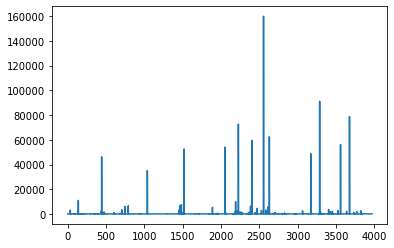

In [21]:
# Check how continus the data is in terms of timestamp
diffTime = df_merged['timestamp'].diff()
diffTimeSec = diffTime.dt.total_seconds()
diffTimeSec.plot()

## Fill Nan

<AxesSubplot:>

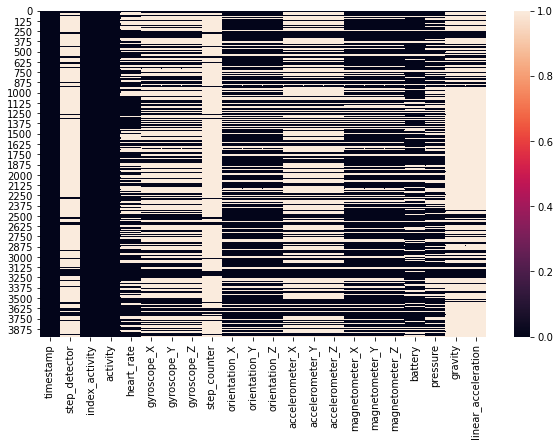

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(pd.isnull(df_merged).astype(int))

In [23]:
# Checking how many Nans there are in each feature
print('step_detector   percentage of nan:',df_merged['step_detector'].isna().sum() / len(df_merged))
print('heart_rate      percentage of nan:',df_merged['heart_rate'].isna().sum() / len(df_merged))
print('gyroscope_X     percentage of nan:',df_merged['gyroscope_X'].isna().sum() / len(df_merged))
print('gyroscope_Y     percentage of nan:',df_merged['gyroscope_Y'].isna().sum() / len(df_merged))
print('gyroscope_Z     percentage of nan:',df_merged['gyroscope_Z'].isna().sum() / len(df_merged))
print('step_counter    percentage of nan:',df_merged['step_counter'].isna().sum() / len(df_merged))
print('orientation_X   percentage of nan:',df_merged['orientation_X'].isna().sum() / len(df_merged))
print('orientation_Y   percentage of nan:',df_merged['orientation_Y'].isna().sum() / len(df_merged))
print('orientation_Z   percentage of nan:',df_merged['orientation_Z'].isna().sum() / len(df_merged))
print('accelerometer_X percentage of nan:',df_merged['accelerometer_X'].isna().sum() / len(df_merged))
print('accelerometer_Y percentage of nan:',df_merged['accelerometer_Y'].isna().sum() / len(df_merged))
print('accelerometer_Z percentage of nan:',df_merged['accelerometer_Z'].isna().sum() / len(df_merged))
print('magnetometer_X  percentage of nan:',df_merged['magnetometer_X'].isna().sum() / len(df_merged))
print('magnetometer_Y  percentage of nan:',df_merged['magnetometer_Y'].isna().sum() / len(df_merged))
print('magnetometer_Z  percentage of nan:',df_merged['magnetometer_Z'].isna().sum() / len(df_merged))
print('battery         percentage of nan:',df_merged['battery'].isna().sum() / len(df_merged))
print('pressure        percentage of nan:',df_merged['pressure'].isna().sum() / len(df_merged))
print('gravity         percentage of nan:',df_merged['gravity'].isna().sum() / len(df_merged))
print('linear_acceleration percentage of nan:',df_merged['linear_acceleration'].isna().sum() / len(df_merged))

step_detector   percentage of nan: 0.8587257617728532
heart_rate      percentage of nan: 0.3908335431881138
gyroscope_X     percentage of nan: 0.5625786955426845
gyroscope_Y     percentage of nan: 0.5625786955426845
gyroscope_Z     percentage of nan: 0.5625786955426845
step_counter    percentage of nan: 0.9012843112566105
orientation_X   percentage of nan: 0.2629060690002518
orientation_Y   percentage of nan: 0.2629060690002518
orientation_Z   percentage of nan: 0.2629060690002518
accelerometer_X percentage of nan: 0.5892722236212541
accelerometer_Y percentage of nan: 0.5892722236212541
accelerometer_Z percentage of nan: 0.5892722236212541
magnetometer_X  percentage of nan: 0.26340972047343236
magnetometer_Y  percentage of nan: 0.26340972047343236
magnetometer_Z  percentage of nan: 0.26340972047343236
battery         percentage of nan: 0.24376731301939059
pressure        percentage of nan: 0.36716192394862757
gravity         percentage of nan: 0.7902291614202972
linear_acceleration per

In [24]:
# Delete features with more than ~80% nan values
df_merged.drop(['step_detector','step_counter','linear_acceleration','gravity'],axis=1,inplace=True)

<AxesSubplot:>

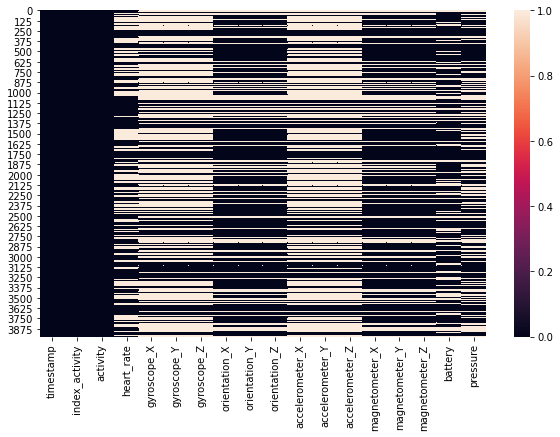

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(pd.isnull(df_merged).astype(int))

In [26]:
inter_df_merged = df_merged.copy(deep = True) # for comparison between before interpolation and after intrpolation we made copy of the table

In [27]:
# We applyed a linear intepolation on the features that contains Nans 
inter_df_merged['heart_rate']  = inter_df_merged['heart_rate'].interpolate()
inter_df_merged['gyroscope_X'] = inter_df_merged['gyroscope_X'].interpolate() 
inter_df_merged['gyroscope_Y'] = inter_df_merged['gyroscope_Y'].interpolate() 
inter_df_merged['gyroscope_Z'] = inter_df_merged['gyroscope_Z'].interpolate() 
inter_df_merged['orientation_X'] = inter_df_merged['orientation_X'].interpolate()
inter_df_merged['orientation_Y'] = inter_df_merged['orientation_Y'].interpolate()
inter_df_merged['orientation_Z'] = inter_df_merged['orientation_Z'].interpolate()
inter_df_merged['accelerometer_X'] = inter_df_merged['accelerometer_X'].interpolate() 
inter_df_merged['accelerometer_Y'] = inter_df_merged['accelerometer_Y'].interpolate() 
inter_df_merged['accelerometer_Z'] = inter_df_merged['accelerometer_Z'].interpolate() 
inter_df_merged['battery']    = inter_df_merged['battery'].interpolate()
inter_df_merged['pressure']   = inter_df_merged['pressure'].interpolate()
inter_df_merged['magnetometer_X'] = inter_df_merged['magnetometer_X'].interpolate()
inter_df_merged['magnetometer_Y'] = inter_df_merged['magnetometer_Y'].interpolate()
inter_df_merged['magnetometer_Z'] = inter_df_merged['magnetometer_Z'].interpolate()

<AxesSubplot:>

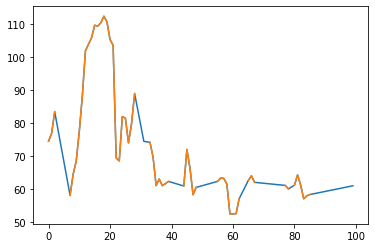

In [28]:
inter_df_merged['heart_rate'][0:100].plot()
df_merged['heart_rate'][0:100].plot()

<AxesSubplot:>

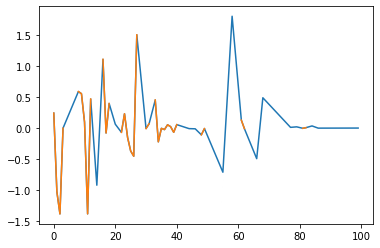

In [29]:
inter_df_merged['gyroscope_X'][0:100].plot()
df_merged['gyroscope_X'][0:100].plot()

<AxesSubplot:>

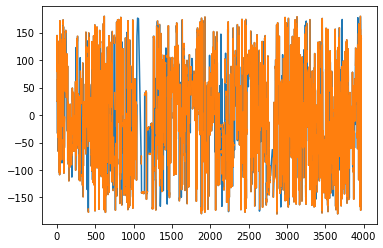

In [30]:
inter_df_merged['orientation_X'].plot()
df_merged['orientation_X'].plot()

<AxesSubplot:>

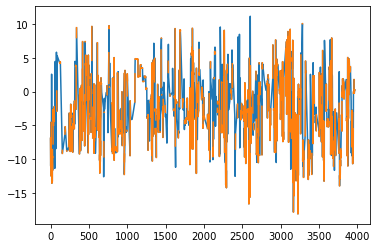

In [31]:
inter_df_merged['accelerometer_X'].plot()
df_merged['accelerometer_X'].plot()

<AxesSubplot:>

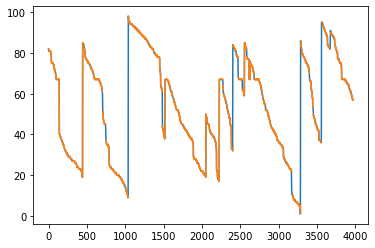

In [32]:
inter_df_merged['battery'].plot()
df_merged['battery'].plot()

<AxesSubplot:>

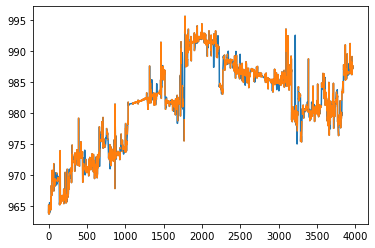

In [33]:
inter_df_merged['pressure'].plot()
df_merged['pressure'].plot()

<AxesSubplot:>

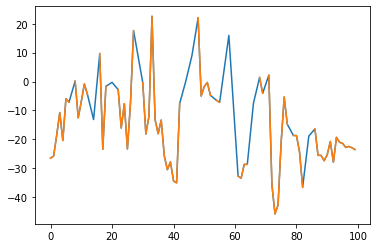

In [34]:
inter_df_merged['magnetometer_Z'][0:100].plot()
df_merged['magnetometer_Z'][0:100].plot()

<AxesSubplot:>

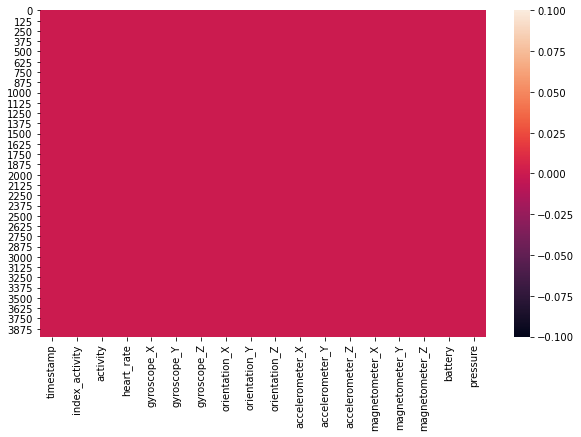

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(pd.isnull(inter_df_merged).astype(int))

In [36]:
# Drop the remain nan values 
NanIdx = np.where(inter_df_merged.isna())
np.unique(NanIdx[0])
inter_df_merged.drop(np.unique(NanIdx[0]),inplace=True)
print(inter_df_merged.isna().sum().sum())

0


In [37]:
inter_df_merged.sort_values(by = 'timestamp',inplace=True)
inter_df_merged.reset_index(inplace=True)
inter_df_merged.to_csv('..\..\..\datasets\Human_Activity\FinalFullDataWatchAct.csv')